In [60]:
import pandas as pd
import requests
import time
from collections import defaultdict

headers = {
    "User-Agent": "Mozilla/5.0 (Windows NT 10.0; WOW64) AppleWebKit/537.36 (KHTML, like Gecko) Chrome/63.0.3239.132 Safari/537.36",
    "Referer": "https://www.lagou.com/jobs/list_%E6%95%B0%E6%8D%AE%E5%88%86%E6%9E%90?city=%E5%8C%97%E4%BA%AC&cl=false&fromSearch=true&labelWords=&suginput=",
}

cookies = {
    "Cookie": "JSESSIONID=ABAAABAAADEAAFI3E2AE80419BA8FFB6F5FFB49D1573C34; _ga=GA1.2.260226169.1531815206; user_trace_token=20180717161326-47e61066-8999-11e8-9c54-525400f775ce; LGUID=20180717161326-47e613e7-8999-11e8-9c54-525400f775ce; _gid=GA1.2.1025242393.1534486196; Hm_lvt_4233e74dff0ae5bd0a3d81c6ccf756e6=1534486196; TG-TRACK-CODE=index_search; fromsite=translate.baiducontent.com; utm_source=""; index_location_city=%E5%8C%97%E4%BA%AC; Hm_lpvt_4233e74dff0ae5bd0a3d81c6ccf756e6=1534650094; _gat=1; LGSID=20180819114134-c4f1bc52-a361-11e8-a9f8-5254005c3644; PRE_UTM=; PRE_HOST=; PRE_SITE=https%3A%2F%2Fwww.lagou.com%2Fjobs%2Flist_%3FlabelWords%3D%26fromSearch%3Dtrue%26suginput%3D; PRE_LAND=https%3A%2F%2Fwww.lagou.com%2Fjobs%2Flist_%25E6%2595%25B0%25E6%258D%25AE%25E5%2588%2586%25E6%259E%2590%3Fcity%3D%25E5%258C%2597%25E4%25BA%25AC%26cl%3Dfalse%26fromSearch%3Dtrue%26labelWords%3D%26suginput%3D; LGRID=20180819114134-c4f1bf1a-a361-11e8-a9f8-5254005c3644; SEARCH_ID=c5acefc2c73649dea43d17ec5f57b810"
}


# 爬取每一页的数据
def crawl_lagou_data(city, kd, pn=1):
    url = "https://www.lagou.com/jobs/positionAjax.json?city={city}&needAddtionalResult=false".format(city=city)
    
    data = {
    "first": True,
    "pn": pn,
    "kd": kd
    }
    rp = requests.post(url, headers=headers, cookies=cookies, data=data)
    
    result = rp.json()
    if not result["success"]:
        print("pn: %s, 抓取失败" % pn)
        return []
    return result["content"]["positionResult"]["result"]

result = defaultdict(list)


for i in range(1, 15):
    print("正在抓取第 %s 页" %i, end="\r")
    job_infos = crawl_lagou_data("广州", "数据分析", i)
    for job_info in job_infos:
        result["companyId"].append(job_info.get("companyId"))
        result["positionId"].append(job_info.get("positionId"))
        result["city"].append(job_info.get("city"))
        result["companyLabelList"].append(",".join(job_info.get("companyLabelList")))
        result["companyShortName"].append(job_info.get("companyShortName"))
        result["companySize"].append(job_info.get("companySize"))
        result["district"].append(job_info.get("district"))
        result["education"].append(job_info.get("education"))
        result["salary"].append(job_info.get("salary"))
        result["workYear"].append(job_info.get("workYear"))
        result["financeStage"].append(job_info.get("financeStage"))
        result["subwayline"].append(job_info.get("subwayline"))     
    print("抓取第 %s 页成功" %i, end="\n")#\r光标回退至开始位置
    if i==14:
        print("共完成%s页"%i)
    time.sleep(10)
df = pd.DataFrame(result)

抓取第 1 页成功
抓取第 2 页成功
抓取第 3 页成功
抓取第 4 页成功
抓取第 5 页成功
抓取第 6 页成功
抓取第 7 页成功
抓取第 8 页成功
抓取第 9 页成功
抓取第 10 页成功
抓取第 11 页成功
抓取第 12 页成功
抓取第 13 页成功
抓取第 14 页成功
共完成14页


In [61]:
print(df.tail())

    city  companyId      companyLabelList companyShortName companySize  \
205   广州     184659  上市公司,行业TOP,交通补助,带薪年假             蓝色光标     2000人以上   
206   广州       1311   带薪年假,定期体检,年度旅游,弹性工作               凡科    150-500人   
207   广州     227746   年底双薪,绩效奖金,带薪年假,定期体检               宝舟     50-150人   
208   广州       8414   带薪年假,午餐补助,扁平管理,弹性工作             一点资讯   500-2000人   
209   广州     342809   年底双薪,带薪年假,绩效奖金,年终分红              千千氏     50-150人   

    district education financeStage  positionId   salary subwayline workYear  
205      天河区        本科         上市公司     3406969  12k-18k       APM线     3-5年  
206      海珠区        本科         上市公司     5164338    6k-8k        8号线    应届毕业生  
207      天河区        本科        不需要融资     4956727   7k-14k       None     1-3年  
208      天河区        本科        D轮及以上     4086969   6k-12k       APM线     1-3年  
209      番禺区        大专          未融资     4272716   8k-13k       None     3-5年  


In [46]:
print("去重前数据：{}".format(df.shape))
df = df.drop_duplicates(subset=["positionId"])
print("去重后数据：{}".format(df.shape))
df.to_csv('df.csv', index=False)

去重前数据：(210, 12)
去重后数据：(210, 12)


In [47]:
import os
os.getcwd()

'/Users/lin/数据分析'

In [48]:
%matplotlib inline
import pandas as pd
import matplotlib.pyplot as plt
plt.rcParams["font.sans-serif"]=["STHeiti"] #用来正常显示中文标签（mac版字体）
plt.rcParams["axes.unicode_minus"]=False #用来正常显示负号

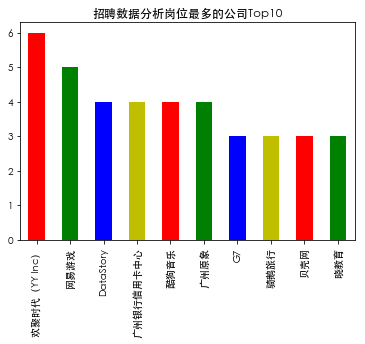

In [49]:
plt.title("招聘数据分析岗位最多的公司Top10")
company_count = df.companyShortName.value_counts()[:10]
company_count.plot.bar(color='rgby');#颜色自定义

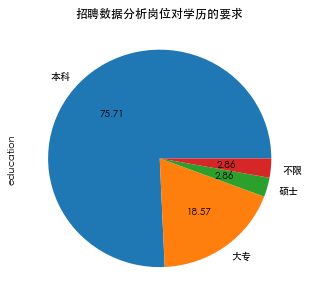

In [50]:
plt.title("招聘数据分析岗位对学历的要求")
df.education.value_counts().plot.pie(figsize=(5, 5), autopct="%.2f");

# 本科需求最大

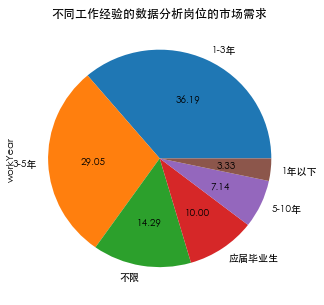

In [51]:
plt.title("不同工作经验的数据分析岗位的市场需求")
df.workYear.value_counts().plot.pie(figsize=(5, 5), autopct="%.2f");

## 答案是3-5年的需求最大

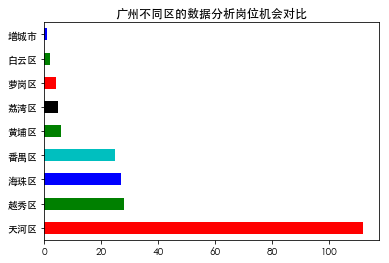

In [52]:
plt.title("广州不同区的数据分析岗位机会对比")
data = df.district.value_counts().plot.barh(color='rgbcgk');

In [56]:
from pyecharts import Geo,Map

data = df.district.value_counts().to_dict()
print(data)
map1 = Map(
    "广州",
    "job",
    title_color="#fff",
    title_pos="center",
    width=600,
    height=400,
    background_color="#404a59",
)
attr, value = geo.cast(data)

map1.add(
    "",
    attr,
    value,
    visual_range=[0, 150],
    maptype="广州",
    visual_text_color="#fff",
    symbol_size=15,
    is_visualmap=True,

)
map1.render("广州.html")#显示在当前目录的html文件

{'天河区': 112, '越秀区': 28, '海珠区': 27, '番禺区': 25, '黄埔区': 6, '荔湾区': 5, '萝岗区': 4, '白云区': 2, '增城市': 1}


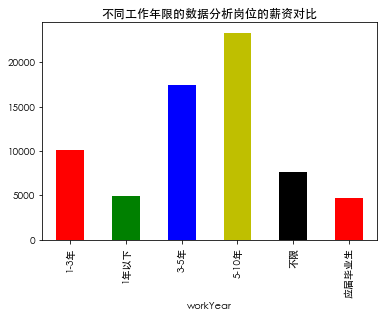

In [54]:

def calculate_salary_mean(salary_str):
    salary_sum = 0
    
    salary_list= salary_str.upper().replace("K", "000").split("-")
    
    for i in salary_list:
        salary_sum += int(i)
    
    return salary_sum / len(salary_list)

# 计算每条招聘信息中新增的平均薪资
df["salary_mean"] = df["salary"].map(lambda x: calculate_salary_mean(x))

plt.title("不同工作年限的数据分析岗位的薪资对比")
work_year_salary_mane = df.groupby("workYear")["salary_mean"].mean()
work_year_salary_mane.plot.bar(color='rgbyk');